# Part 1

In [1]:
import pandas as pd

"""
Description
--------------------------------
Survival in patients with advanced lung cancer from the North Central Cancer Treatment Group. Performance scores rate how well the patient can perform usual daily
activities.

Format
--------------------------------
inst: Institution code
time: Survival time in days
status: censoring status 1=censored, 2=dead
age: Age in years
sex: Male=1 Female=2
ph.ecog: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in bed <50% of the day, 3= in bed > 50%

of the day but not bedbound, 4 = bedbound

ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
pat.karno: Karnofsky performance score as rated by patient
meal.cal: Calories consumed at meals
wt.loss: Weight loss in last six months
"""

dataset = pd.read_csv("lung.csv")
dataset.tail()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
223,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
224,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,1,58,2,1.0,80.0,90.0,1060.0,0.0


In [2]:
# Data transformation
dataset.loc[dataset["status"]==1, "status"] = 0
dataset.loc[dataset["status"]==2, "status"] = 1
dataset.dropna(inplace=True)
dataset.drop(columns="inst", inplace=True)

dataset.tail()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
221,203,0,71,2,1.0,80.0,90.0,1025.0,0.0
224,191,0,39,1,0.0,90.0,90.0,2350.0,-5.0
225,105,0,75,2,2.0,60.0,70.0,1025.0,5.0
226,174,0,66,1,1.0,90.0,100.0,1075.0,1.0
227,177,0,58,2,1.0,80.0,90.0,1060.0,0.0


## Cox Propotional Hazard

In [3]:
#CPH model
from lifelines import CoxPHFitter
cph_model = CoxPHFitter()
cph_model.fit(dataset,
              "time",
              event_col="status")

cph_model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2025-04-06 08:36:43 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01           -0.01            0.03                0.99                1.03
sex       -0.55      0.57      0.20           -0.95           -0.16                0.39                0.85
ph.ecog    0.74      2.09      0.22            0.30            1.18                1.35                3.26
ph.karno   0.02      1.02      0.01            0.00            0.04                1.00                1.05
pat.karno -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.01      0.99      0.01           -0.03            0.00                0.97                1.00

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  0.93   0.35      1.51
sex          0.00 -2.75   0.01      7.37
ph.ecog      0.00  3.29 <0.005      9.95
ph.karno     0.00  2.00   0.05      4.45
pat.karno    0.00 -1.49   0.14      2.87
meal.cal     0.00  0.11   0.91      0.13
wt.loss      0.00 -1.83   0.07      3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

### Ploting

<Axes: xlabel='log(HR) (95% CI)'>

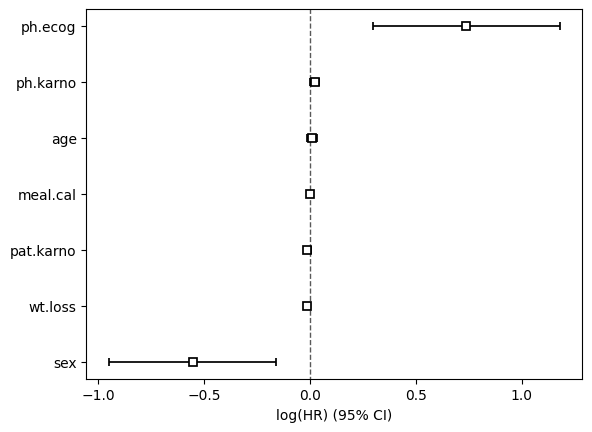

In [4]:
cph_model.plot()

# Part 2

In [5]:
import pandas as pd

"""
Description
--------------------------------
Randomised trial of two treatment regimens for lung cancer. This is a standard survival analysis data set.

Format
--------------------------------
trt: 1=standard 2=test
celltype: 1=squamous, 2=smallcell, 3=adeno, 4=large
time: survival time
status: censoring status
karno: Karnofsky performance score (100=good)
diagtime: months from diagnosis to randomisation
age: in years
prior: prior therapy 0=no, 10=yes
"""
veteran = pd.read_csv("veteran.csv")
veteran.head()

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


In [6]:
veteran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trt       137 non-null    int64 
 1   celltype  137 non-null    object
 2   time      137 non-null    int64 
 3   status    137 non-null    int64 
 4   karno     137 non-null    int64 
 5   diagtime  137 non-null    int64 
 6   age       137 non-null    int64 
 7   prior     137 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [7]:
# Data transformation
veteran = pd.get_dummies(veteran, drop_first=True)

veteran.head()

,trt,time,status,karno,diagtime,age,prior,celltype_large,celltype_smallcell,celltype_squamous
0,1,72,1,60,7,69,0,False,False,True
1,1,411,1,70,5,64,10,False,False,True
2,1,228,1,60,3,38,0,False,False,True
3,1,126,1,60,9,63,10,False,False,True
4,1,118,1,70,11,65,10,False,False,True


In [8]:
from lifelines import CoxPHFitter

cph_model_vet = CoxPHFitter()
cph_model_vet.fit(veteran,
                  "time",
                  event_col="status")

cph_model_vet.print_summary()

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -474.40
         time fit was run = 2025-04-06 08:36:44 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
trt                 0.29      1.34      0.21           -0.11            0.70                0.89                2.02
karno              -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
diagtime            0.00      1.00      0.01           -0.02            0.02                0.98                1.02
age                -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
prior               0.01      1.01      0.02           -0.04            0.05                0.96                1.05
celltype_large     -0.79      0.45      0.30           -1.39           -0.20                0.25                0.82
celltype_smallcell -0.33      0.72      0.28           -0.88            0.21                0.42                1.23
celltype_squamous  -1.20      0.30      0.30           -1.79           -0.61                0.17                0.55

                    cmp to     z      p  -log2(p)
covariate                                        
trt                   0.00  1.42   0.16      2.68
karno                 0.00 -5.96 <0.005     28.55
diagtime              0.00  0.01   0.99      0.01
age                   0.00 -0.94   0.35      1.52
prior                 0.00  0.31   0.76      0.40
celltype_large        0.00 -2.62   0.01      6.85
celltype_smallcell    0.00 -1.21   0.23      2.15
celltype_squamous     0.00 -3.97 <0.005     13.79
---
Concordance = 0.74
Partial AIC = 964.79
log-likelihood ratio test = 62.10 on 8 df
-log2(p) of ll-ratio test = 32.37

<Axes: xlabel='log(HR) (95% CI)'>

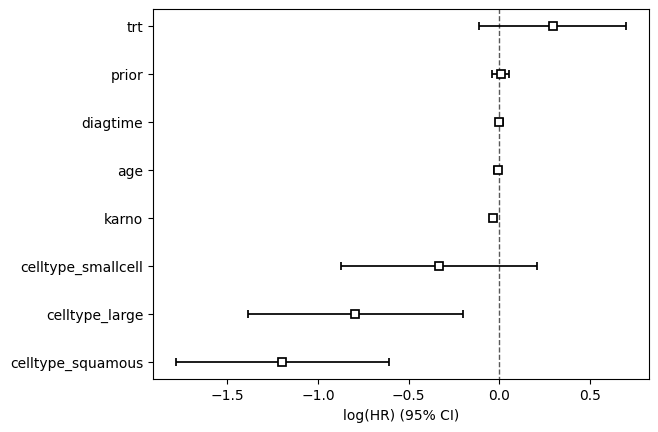

In [9]:
cph_model_vet.plot()